In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
import keras
import math

Using TensorFlow backend.


In [2]:
# y = w * x + b 함수
def myfunc(x):
  y = math.cos(x) + math.sin(x) * math.sin(x)
  noise = random.random() * 0.1    # Noise
  return y + noise

In [3]:
# random.random() -- (0.0 ~ 1.0)
NUM_DATA = 100      # 데이터 갯수
XVALUE = 5          # X값의 범위 (0.0 ~ 5.0)

xlist = [random.random() * XVALUE for i in range(NUM_DATA)]
xlist.sort()        # sorting
ylist = [myfunc(x) for x in xlist]

xtest = [random.random() * XVALUE for i in range(NUM_DATA)]

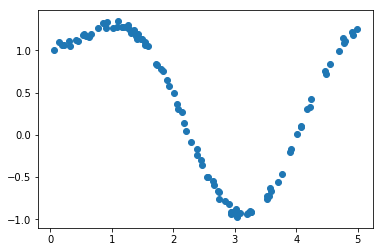

In [4]:
fig, ax = plt.subplots()
ax.scatter(xlist, ylist, label='actual')
plt.show()

In [5]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xlist = np.array(xlist)
ylist = np.array(ylist)
print('xlist.shape :',xlist.shape)  # shape ==  (10,)
print('ylist.shape :',ylist.shape)  # shape ==  (10,)

xlist.shape : (100,)
ylist.shape : (100,)


In [6]:
# type 에 맞추기 위해 reshape
xlist = xlist.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ylist = ylist.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xlist.shape)
print('ylist.shape :', ylist.shape)

xlist.shape : (100, 1)
ylist.shape : (100, 1)


In [8]:
# keras
from keras.models import Sequential
model = Sequential()
model.add(Dense(5, input_dim=1, activation='tanh'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

adam_opt = keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=adam_opt, loss='mean_squared_error')# model 학습
hist = model.fit(xlist, ylist, epochs=200)

Epoch 1/200
100/100 [==============================] - 0s - loss: 0.6745     
Epoch 2/200
100/100 [==============================] - 0s - loss: 0.6363     
Epoch 3/200
100/100 [==============================] - 0s - loss: 0.4371     
Epoch 4/200
100/100 [==============================] - 0s - loss: 0.4333     
Epoch 5/200
100/100 [==============================] - 0s - loss: 0.3779     
Epoch 6/200
100/100 [==============================] - 0s - loss: 0.3873     
Epoch 7/200
100/100 [==============================] - 0s - loss: 0.3628     
Epoch 8/200
100/100 [==============================] - 0s - loss: 0.3656     
Epoch 9/200
100/100 [==============================] - 0s - loss: 0.3266     
Epoch 10/200
100/100 [==============================] - 0s - loss: 0.3477     
Epoch 11/200
100/100 [==============================] - 0s - loss: 0.3038     
Epoch 12/200
100/100 [==============================] - 0s - loss: 0.3063     
Epoch 13/200
100/100 [==============================] - 0s - 

100/100 [==============================] - 0s - loss: 0.0052     
Epoch 105/200
100/100 [==============================] - 0s - loss: 0.0060     
Epoch 106/200
100/100 [==============================] - 0s - loss: 0.0065     
Epoch 107/200
100/100 [==============================] - 0s - loss: 0.0063     
Epoch 108/200
100/100 [==============================] - 0s - loss: 0.0069     
Epoch 109/200
100/100 [==============================] - 0s - loss: 0.0071     
Epoch 110/200
100/100 [==============================] - 0s - loss: 0.0085     
Epoch 111/200
100/100 [==============================] - 0s - loss: 0.0058     
Epoch 112/200
100/100 [==============================] - 0s - loss: 0.0074     
Epoch 113/200
100/100 [==============================] - 0s - loss: 0.0080     
Epoch 114/200
100/100 [==============================] - 0s - loss: 0.0063     
Epoch 115/200
100/100 [==============================] - 0s - loss: 0.0093     
Epoch 116/200
100/100 [==============================]

In [9]:
print(model.layers[1].get_weights())

# model 예상
predict = model.predict(xtest)

[array([[ 3.94433427, -3.79533553,  4.69502211, -2.65040636, -3.53424954],
       [ 0.01202306, -0.77504617, -2.14211059, -0.11818764,  0.55848682],
       [-2.97067881,  2.89878011,  0.63310552,  2.59688497, -0.45229846],
       [-4.13454151,  2.93070245, -2.78461242,  3.5306139 ,  2.70384359],
       [-1.61246872,  0.98437667, -0.0983668 ,  2.73908472, -0.1831819 ]], dtype=float32), array([-0.12392836, -0.06778668, -2.39874959, -0.24118046,  0.5797075 ], dtype=float32)]


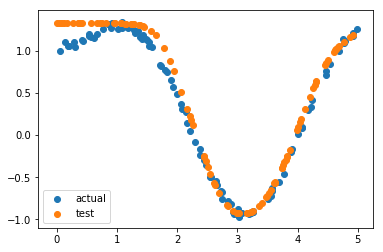

In [10]:
# plt
fig, ax = plt.subplots()
ax.scatter(xlist, ylist, label='actual')
ax.scatter(xtest, predict, label='test')

ax.legend()
plt.show()
